# Loading libraries

In [35]:
import os
import tensorflow.keras

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from imblearn.over_sampling import SMOTE

# Loading the data

In [25]:
PC_USER = 'veronicalarroy'

DATA_PATH = f'/Users/{PC_USER}/data/isic-2024-challenge'

flattened_images_csv_path = f'{DATA_PATH}/temp/flattened_images.csv'

In [29]:
for _, _, filenames in os.walk(f'{DATA_PATH}/train-image/image'):
    all_images = filenames

all_images_dfs = []

i = 0

print(f"Flattenning {len(all_images)} images...")

last_percentage = -1

for image_name in all_images:

    i = i+1
    percentage = int((i/len(all_images))*100)

    image_code = image_name.replace('.jpg','')

    if last_percentage != percentage:
        print(f"{percentage}%: Flattened {i}/{len(all_images)} image")
        last_percentage = percentage

    image_name = f"{DATA_PATH}/train-image/image/{image_name}"

    image = load_img(image_name, color_mode='grayscale')

    image_array = img_to_array(image) / 255.0

    image_resized = tf.image.resize(image_array, (32, 32))

    image_numpy = image_resized.numpy()

    flattened_image = image_numpy.flatten()

    df = pd.DataFrame([flattened_image])
    df["image_code"] = image_code

    all_images_dfs.append(df)

final_df = pd.concat(all_images_dfs, ignore_index=True)

final_df.to_csv(flattened_images_csv_path, sep='|', index=False)

Loading 401059 images...
0%: Loading 1/401059 image
1%: Loading 4011/401059 image
2%: Loading 8022/401059 image
3%: Loading 12032/401059 image
4%: Loading 16043/401059 image
5%: Loading 20053/401059 image
6%: Loading 24064/401059 image
7%: Loading 28075/401059 image
8%: Loading 32085/401059 image
9%: Loading 36096/401059 image
10%: Loading 40106/401059 image
11%: Loading 44117/401059 image
12%: Loading 48128/401059 image
13%: Loading 52138/401059 image
14%: Loading 56149/401059 image
15%: Loading 60159/401059 image
16%: Loading 64170/401059 image
17%: Loading 68181/401059 image
18%: Loading 72191/401059 image
19%: Loading 76202/401059 image
20%: Loading 80212/401059 image
21%: Loading 84223/401059 image
22%: Loading 88233/401059 image
23%: Loading 92244/401059 image
24%: Loading 96255/401059 image
25%: Loading 100265/401059 image
26%: Loading 104276/401059 image
27%: Loading 108286/401059 image
28%: Loading 112297/401059 image
29%: Loading 116308/401059 image
30%: Loading 120318/401059

In [26]:
df = pd.read_csv(flattened_images_csv_path, sep='|')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,image_code
0,0.616606,0.577267,0.613872,0.637371,0.635075,0.677866,0.585968,0.600151,0.567982,0.627022,...,0.602912,0.633121,0.641115,0.575315,0.603598,0.613399,0.646135,0.634868,0.634188,ISIC_9212838
1,0.478493,0.466725,0.421385,0.372685,0.393321,0.387633,0.425748,0.470541,0.471569,0.449571,...,0.549632,0.559865,0.526887,0.551950,0.548950,0.537520,0.537863,0.552130,0.564766,ISIC_7419042
2,0.585056,0.651062,0.652791,0.672380,0.656003,0.675552,0.675358,0.690664,0.669301,0.645956,...,0.656732,0.627902,0.640406,0.633198,0.635294,0.611318,0.625947,0.612152,0.592538,ISIC_4607958
3,0.533248,0.483118,0.473112,0.477292,0.519054,0.467162,0.458503,0.547567,0.619505,0.390867,...,0.552022,0.552574,0.527569,0.528597,0.569337,0.497210,0.513868,0.495018,0.506924,ISIC_2314849
4,0.647059,0.648162,0.660705,0.648713,0.634649,0.644948,0.607822,0.582543,0.611128,0.622100,...,0.617279,0.618873,0.613635,0.619430,0.584375,0.602756,0.627022,0.642437,0.643137,ISIC_1432149


In [27]:
df_meta= pd.read_csv(
    f"{DATA_PATH}/train-metadata.csv",
    dtype = {
        'isic_id': 'string',
        'target': 'int64',
        'patient_id': 'string',
        'age_approx': 'float64',
        'sex': 'string',
        'anatom_site_general': 'string',
        'clin_size_long_diam_mm': 'float64',
        'image_type': 'string',
        'tbp_tile_type': 'string',
        'tbp_lv_A': 'float64',
        'tbp_lv_Aext': 'float64',
        'tbp_lv_B': 'float64',
        'tbp_lv_Bext': 'float64',
        'tbp_lv_C': 'float64',
        'tbp_lv_Cext': 'float64',
        'tbp_lv_H': 'float64',
        'tbp_lv_Hext': 'float64',
        'tbp_lv_L': 'float64',
        'tbp_lv_Lext': 'float64',
        'tbp_lv_areaMM2': 'float64',
        'tbp_lv_area_perim_ratio': 'float64',
        'tbp_lv_color_std_mean': 'float64',
        'tbp_lv_deltaA': 'float64',
        'tbp_lv_deltaB': 'float64',
        'tbp_lv_deltaL': 'float64',
        'tbp_lv_deltaLB': 'float64',
        'tbp_lv_deltaLBnorm': 'float64',
        'tbp_lv_eccentricity': 'float64',
        'tbp_lv_location': 'string',
        'tbp_lv_location_simple': 'string',
        'tbp_lv_minorAxisMM': 'float64',
        'tbp_lv_nevi_confidence': 'float64',
        'tbp_lv_norm_border': 'float64',
        'tbp_lv_norm_color': 'float64',
        'tbp_lv_perimeterMM': 'float64',
        'tbp_lv_radial_color_std_max': 'float64',
        'tbp_lv_stdL': 'float64',
        'tbp_lv_stdLExt': 'float64',
        'tbp_lv_symm_2axis': 'float64',
        'tbp_lv_symm_2axis_angle': 'int64',
        'tbp_lv_x': 'float64',
        'tbp_lv_y': 'float64',
        'tbp_lv_z': 'float64',
        'attribution': 'string',
        'copyright_license': 'string',
        'lesion_id': 'string',
        'iddx_full': 'string',
        'iddx_1': 'string',
        'iddx_2': 'string',
        'iddx_3': 'string',
        'iddx_4': 'string',
        'iddx_5': 'string',
        'mel_mitotic_index': 'string',
        'mel_thick_mm': 'float64',
        'tbp_lv_dnn_lesion_confidence': 'float64'
    }
)

# Small Exploratory Data Analysis (EDA)

### Checking for melanoma distribution in img df

In [28]:
melanoma_counts = df_meta["target"].value_counts()
melanoma_counts #extrenely imbalanced

target
0    400666
1       393
Name: count, dtype: int64

/var/folders/m3/cvmhd4j11f7968wyg9z4qfdr0000gn/T/ipykernel_1249/3501452476.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(melanoma_counts[i]), ha='center', va='bottom')


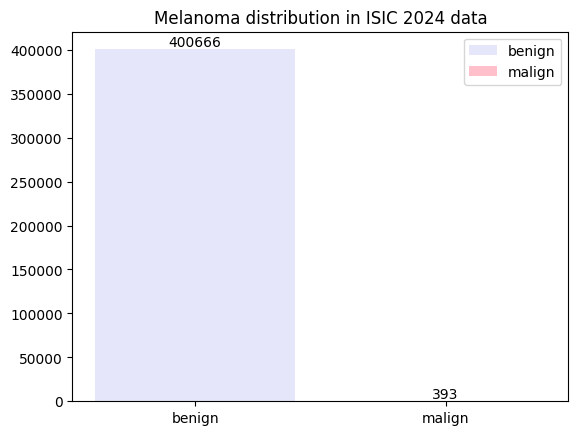

In [29]:
melanoma_counts = pd.Series({'benign': 400666, 'malign': 393})

colors = ['lavender', 'pink']
bars = plt.bar(melanoma_counts.index, melanoma_counts, color=colors)

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, 
             str(melanoma_counts[i]), ha='center', va='bottom')

plt.legend(bars, ['benign', 'malign'])
plt.title("Melanoma distribution in ISIC 2024 data")

plt.show()

### Checking for null values in meta df

In [30]:
df_meta.isnull().sum()

isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

#### Dropping columns with a lot of nulls

In [31]:
df_meta.drop(columns=["lesion_id", "iddx_2", "iddx_3", "iddx_4", "iddx_5", "mel_mitotic_index", "mel_thick_mm"], inplace = True)

### Pre-treatment of "age", "sex", "anatom_site_general" columns & Label Encoding

#### Sex

In [32]:
df_meta['sex'].fillna('unkown',inplace = True)

/var/folders/m3/cvmhd4j11f7968wyg9z4qfdr0000gn/T/ipykernel_1249/1570308228.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_meta['sex'].fillna('unkown',inplace = True)


In [33]:
enc = LabelEncoder()

In [34]:
df_meta['sex_enc'] = enc.fit_transform(df_meta.sex.astype('str'))

<Axes: xlabel='sex', ylabel='count'>

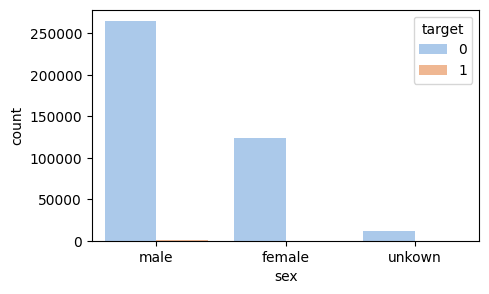

In [38]:
plt.figure(figsize = (5,3))
sns.countplot(x = 'sex', hue = 'target', data = df_meta, palette="pastel")

#### Anatom_site_general

In [41]:
df_meta.anatom_site_general = df_meta.anatom_site_general.fillna('unknown')

In [42]:
df_meta['anatom_enc']= enc.fit_transform(df_meta.anatom_site_general.astype('str'))

#### Age

In [43]:
df_meta['age_approx'] = df_meta['age_approx'].fillna(df_meta['age_approx'].mode().values[0])

In [44]:
df_meta['age_enc']= enc.fit_transform(df_meta['age_approx'].astype('str'))

<Axes: xlabel='age_approx', ylabel='count'>

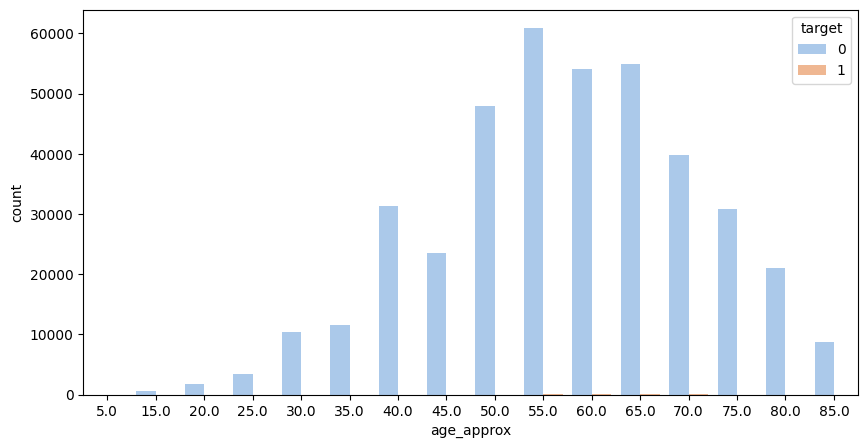

In [47]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'age_approx', hue = 'target', data = df_meta, palette="pastel")